# Probability distribution

## Binomial Distribution

### [Mean of Binomial Distribution](https://sciencing.com/law-probability-8657085.html)
Suppose you have three green marbles and one red marble in a bowl. In your experiment, you select a marble and record "success" if it's red or "failure" if it's green, and then you put the marble back and select again. The probability of success - - selecting a red marble -- is one out of four, or 1/4, which is 0.25. If you conduct the experiment 100 times, you would expect to draw a red marble one quarter of the time, or 25 times in total. This is the mean of the binomial distribution, which is defined as the number of trials, 100, times the probability of success for each trial, 0.25, or 100 times 0.25, which is equal to 25.

### Variance of Binomial Distribution
When you select 100 marbles, you won't always choose exactly 25 red marbles; your actual results will vary. If the probability of success, "p," is 1/4, or 0.25, that means the probability of failure is 3/4, or 0.75, which is "(1 - p)." The variance is defined as the number of trials times "p" times "(1-p)." For the marble experiment, the variance is 100 times 0.25 times 0.75, or 18.75.

### Understanding Variance
Because the variance is in square units, it's not as intuitive as the mean. However, if you take the square root of the variance, called the standard deviation, it tells you by how much you can expect your actual results to vary, on average. The square root of 18.75 is 4.33, which means you can expect the number of red marbles to be between 21 (25 minus 4) and 29 (25 plus 4) for each 100 selections.

### for example
let green mable as 'G' and red marble as 'R'. and probability of getting Red bol is 25%. and we trial this experiment 100 times

-------------------------------------------------------------
In 20 days we get 5.0 days for 25.0% desire output
-------------------------------------------------------------
your average number of successes is 5.0 in 20 trials if you repeat the trials many times.
-------------------------------------------------------------


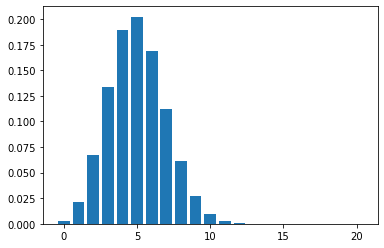

In [1]:
from binomial import Binomial

[a,c,e] = Binomial('RG', checkParam="R",probability=0.25,repeat=20)

In [1]:
from scipy.stats import binom
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

In [5]:
n, p = 10, 0.4
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

### percent-point-function [ppf](./ppf.ipynb)  

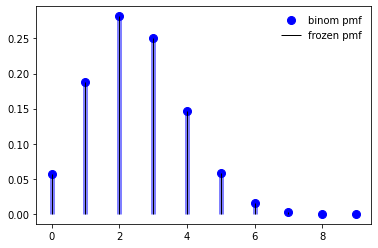

In [26]:
fig, ax = plt.subplots(1, 1)

n, p = 10, 0.25
x = np.arange(binom.ppf(0.00001, n, p),
              binom.ppf(1, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
rv = binom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
        label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

### Fitting of binomial distribution from observed data
**Example-11.3.5:** Twelve dice were thrown 2,630 times and each time the number of dice which had 5 or 6 on the uppermost face were recorded. The results are shown in the following table:

| NUMBER OF DICE WITH 5 OR 6 UPPER MOS:X | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10| 11 OR 12 |
|----------------------------------------|---|---|---|---|---|---|---|---|---|---|---|----------|
| **FREQUENCY:Y**                         |18 |115|326|548|611|519|307|133|40 | 11| 2 |    0     |

Graduate the observed distribution 
(a) with a binomial distribution for which p is unknown
(b) with a binomial distribution for which $p = \frac{1}{3}$




In [19]:
x  = np.linspace(0,11,12)
y = np.array([18,115,326,548,611,519,307,133,40,11,2,0])
xBar = sum(np.multiply(x,y))/sum(y)

4.0539923954372625

Answer(a):
Here tofit a binomial distribution, p has to be estimated from the observed distribution. The mean of the frequency distribution is 
$$ \bar{x}=\frac{\sum fx}{\sum f} = \frac{10,662}{2630} = 4.05399 $$


In [21]:
probability = xBar/len(y)
probabilityr = 1- probability

so the extimate of p is $\hat{p} = \frac{4.05399}{12} = 0.33783$ and $\hat{q} = 0.66217$
The probability f(x) are calculated by using the recursion relation. Thus,
$$f(x) = [\frac{n-x+1}{x} \frac{\hat{p}}{\hat{q}}] f(x-1)       for x=1,2,...,12$$



In [36]:
def recursion(x, n, p, q):
    if x == 0:
        return 0.0071061
    else:
       return ((n-x+1)/x)*(p/q) * recursion(x-1,n,p,q)

here $f(0) = \hat{q}^{12}$
or, $log(f(0)) = 12 log(0.66217)$$

=3.8516340 = log(0.0071061) <br>
Hence, $f(0) = 0.0071061$, <br>
Also, $ \frac{\hat{p}}{\hat{q}} = 0.51019$

The subsewuent calculations are shown in the table,

| x         | $\frac{n-x+1}{x}.\frac{\hat{p}}{\hat{q}}$ | f(x)      | Expected frequency    | Observed frequency |
|-----------|-------------------------------------------|-----------|-----------------------|--------------------|
| 0         | --                                        | 0.0071061 | 0.71061*2630=18.69=19 | 18                 |
| 1         | 6.1228                                    | 0.0435    | 114.42=114            | 115                |
| 2         | 2.806                                     | 0.1220782 | 321.07=321            | 326                |
| 3         | 1.70063                                   | 0.2076098 | 546.01=546            | 548                |
| 4         | 1.14793                                   | 0.2383215 | 626.79=627            | 611                |
| 5         | 0.81630                                   | 0.1945418 | 511.64=512            | 519                |
| 6         | 0.59522                                   | 0.1157952 | 304.54=305            | 307                |
| 7         | 0.43730                                   | 0.0506372 | 133.18=133            | 133                |
| 8         | 0.31887                                   | 0.0161467 | 42.47=42              | 40                 |
| 9         | 0.22675                                   | 0.0036613 | 9.63=10               | 11                 |
| 10        | 0.15306                                   | 0.0005604 | 1.47=1                | 2                  |
| 11 and 12 | ----                                      | 0.0000363 | 0.09=0                | 0                  |
| total     |                                           | 1.000000  | 2630                  | 2630               |


**A comparison of the last two columns of the table indicates that the fit has been quit satisfactory**

In [51]:
f_x = [0.0071061]
for i in x[1:]:
    f_x.append(recursion(i,12,probability,probabilityr))
import math
exp_freq = np.around(np.multiply(f_x,2630),0)
df = pd.DataFrame({
    'x':x,
    'f_of_x':f_x,
    'Expected_frequency':exp_freq,
    'observe_frequency':y
})
df


,x,f_of_x,Expected_frequency,observe_frequency
0,0.0,0.007106,19.0,18
1,1.0,0.043506,114.0,115
2,2.0,0.122080,321.0,326
3,3.0,0.207614,546.0,548
4,4.0,0.238326,627.0,611
5,5.0,0.194548,512.0,519
6,6.0,0.115800,305.0,307
7,7.0,0.050640,133.0,133
8,8.0,0.016148,42.0,40
9,9.0,0.003662,10.0,11


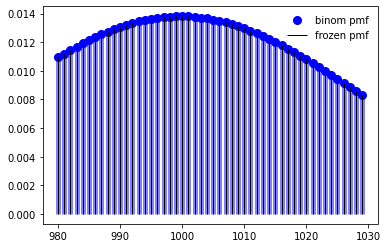

In [21]:
fig, ax = plt.subplots(1, 1)

n, p = 6000, 1/6
x = np.arange(980,1030)
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
rv = binom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
        label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

0.607152654837941

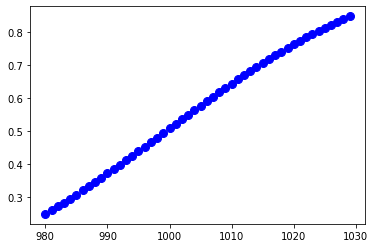

In [26]:
plt.plot(x, binom.cdf(x, n, p), 'bo', ms=8, label='binom pmf')
sum(binom.pmf(x,n,p))

In [16]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])